# Household Electric Power Consumption

* This dataset contains measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available. The data is from the Kaggle, you can check [here](https://www.kaggle.com/uciml/electric-power-consumption-data-set).

* In this this project we will work on regression task in a time series dataset, we will try to predict Global_active_power values based on another features. 

* (globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset format is in the txt file, so we need to convert it into csv file....

In [2]:
# turn txt file to csv file format
# ehc = pd.read_csv('household_power_consumption.txt', delimiter=';')
# ehc.to_csv('household_power_consumption.csv', index=None)

In [3]:
ehc = pd.read_csv('household_power_consumption.csv', low_memory=False)
ehc

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


## Data Dictionary

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

Attribute Information:

1. date: Date in format dd/mm/yyyy

2. time: time in format hh:mm:ss

3. globalactivepower: household global minute-averaged active power (in kilowatt)

4. globalreactivepower: household global minute-averaged reactive power (in kilowatt)

5. voltage: minute-averaged voltage (in volt)

6. global_intensity: household global minute-averaged current intensity (in ampere)

7. submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8. submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9. submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Exploratory Data Analysis

In [4]:
ehc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
ehc['Date'] = ehc['Date'] + ' ' + ehc['Time']
del ehc['Time']
ehc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Global_active_power    object 
 2   Global_reactive_power  object 
 3   Voltage                object 
 4   Global_intensity       object 
 5   Sub_metering_1         object 
 6   Sub_metering_2         object 
 7   Sub_metering_3         float64
dtypes: float64(1), object(7)
memory usage: 126.7+ MB


In [6]:
ehc['Date'] = pd.to_datetime(ehc['Date'], infer_datetime_format=True)
ehc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Global_active_power    object        
 2   Global_reactive_power  object        
 3   Voltage                object        
 4   Global_intensity       object        
 5   Sub_metering_1         object        
 6   Sub_metering_2         object        
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [7]:
ehc

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [8]:
ehc.isna().sum()

Date                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

All missing data is low, so we can delete it.....

In [9]:
ehc.dropna(inplace=True)
ehc.reset_index(inplace=True, drop=True)
ehc

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2049276,2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2049277,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2049278,2010-11-26 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [10]:
ehc.isna().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']
ehc[cols] = ehc[cols].apply(pd.to_numeric).astype('float32')
ehc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Global_active_power    float32       
 2   Global_reactive_power  float32       
 3   Voltage                float32       
 4   Global_intensity       float32       
 5   Sub_metering_1         float32       
 6   Sub_metering_2         float32       
 7   Sub_metering_3         float32       
dtypes: datetime64[ns](1), float32(7)
memory usage: 70.4 MB


In [12]:
ehc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Global_active_power    float32       
 2   Global_reactive_power  float32       
 3   Voltage                float32       
 4   Global_intensity       float32       
 5   Sub_metering_1         float32       
 6   Sub_metering_2         float32       
 7   Sub_metering_3         float32       
dtypes: datetime64[ns](1), float32(7)
memory usage: 70.4 MB


Now, all of our data is in the right data type..... Let's save into csv file.

In [13]:
# ehc.to_csv('electric_consumption.csv', index=False)

In [14]:
ehc[:20]

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.839996,18.400000,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630005,23.000000,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.289993,23.000000,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740005,23.000000,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.679993,15.800000,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.020004,15.000000,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.089996,15.800000,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.220001,15.800000,0.0,1.0,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.990005,15.800000,0.0,1.0,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.860001,15.800000,0.0,2.0,16.0


### Visualize few important features

In [15]:
ehc['Date'].dt.date

0          2006-12-16
1          2006-12-16
2          2006-12-16
3          2006-12-16
4          2006-12-16
              ...    
2049275    2010-11-26
2049276    2010-11-26
2049277    2010-11-26
2049278    2010-11-26
2049279    2010-11-26
Name: Date, Length: 2049280, dtype: object

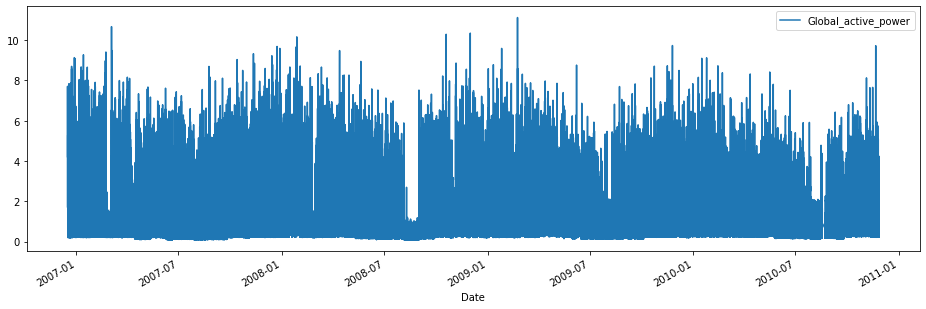

In [16]:
ehc.plot('Date', 'Global_active_power', figsize=(16,5));

In [17]:
def plot_labels(x,y):
    ehc.plot(x,y, figsize=(16,5))

In [18]:
ehc.columns

Index(['Date', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

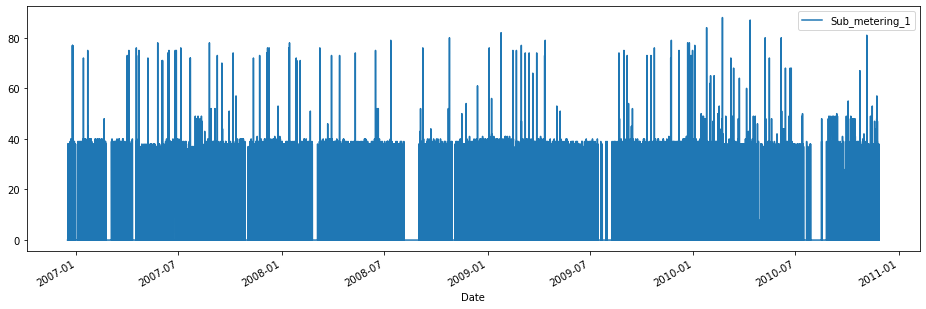

In [19]:
plot_labels('Date', 'Sub_metering_1')

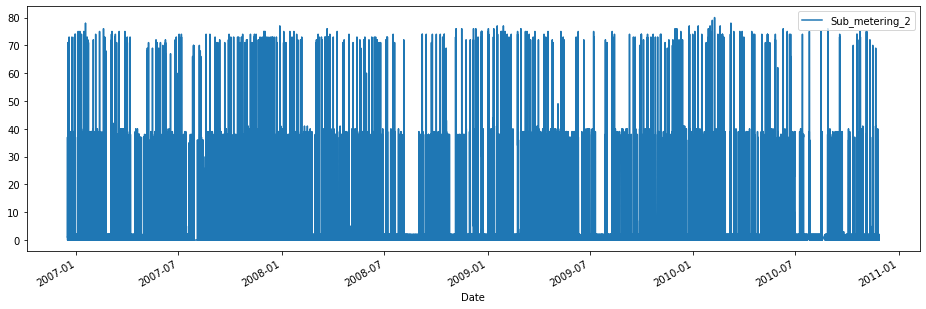

In [20]:
plot_labels('Date', 'Sub_metering_2')

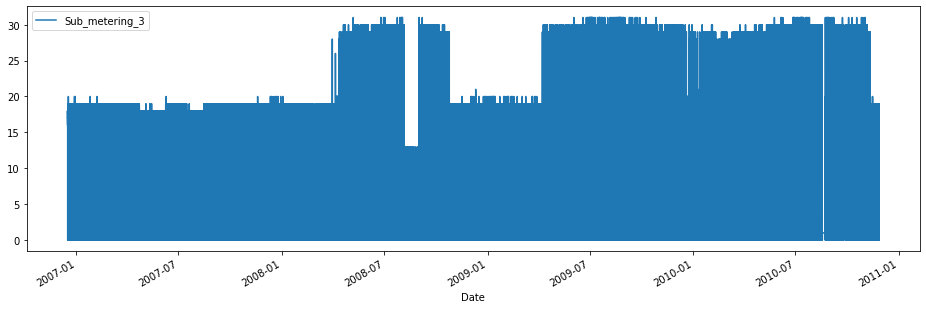

In [21]:
plot_labels('Date', 'Sub_metering_3')

In [22]:
def corr_to_target(dataframe, target, title=None, file=None):
    plt.figure(figsize=(5,7))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target, ascending=False),
               annot=True, cmap='coolwarm')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')
    plt.ylabel('')
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

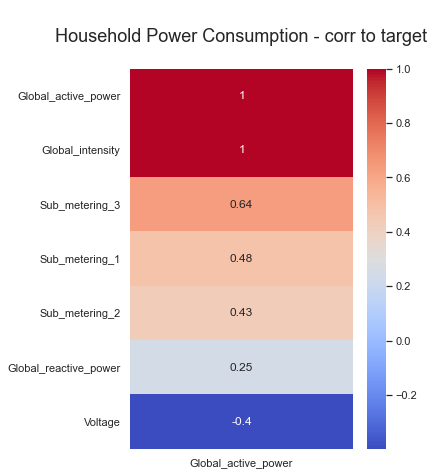

In [23]:
# correlation between target and all features
corr_to_target(ehc, 'Global_active_power', 'Household Power Consumption - corr to target')

In [24]:
ehc.isna().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [25]:
ehc.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408398e+02,4.627758e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [26]:
ehc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Global_active_power    float32       
 2   Global_reactive_power  float32       
 3   Voltage                float32       
 4   Global_intensity       float32       
 5   Sub_metering_1         float32       
 6   Sub_metering_2         float32       
 7   Sub_metering_3         float32       
dtypes: datetime64[ns](1), float32(7)
memory usage: 70.4 MB


In [27]:
# create year, month and day column
ehc['Year'] = ehc.Date.dt.year
ehc['Month'] = ehc.Date.dt.month
ehc['Day'] = ehc.Date.dt.day
ehc.T

,0,1,2,3,4,5,6,7,8,9,...,2049270,2049271,2049272,2049273,2049274,2049275,2049276,2049277,2049278,2049279
Date,2006-12-16 17:24:00,2006-12-16 17:25:00,2006-12-16 17:26:00,2006-12-16 17:27:00,2006-12-16 17:28:00,2006-12-16 17:29:00,2006-12-16 17:30:00,2006-12-16 17:31:00,2006-12-16 17:32:00,2006-12-16 17:33:00,...,2010-11-26 20:53:00,2010-11-26 20:54:00,2010-11-26 20:55:00,2010-11-26 20:56:00,2010-11-26 20:57:00,2010-11-26 20:58:00,2010-11-26 20:59:00,2010-11-26 21:00:00,2010-11-26 21:01:00,2010-11-26 21:02:00
Global_active_power,4.216,5.36,5.374,5.388,3.666,3.52,3.702,3.7,3.668,3.662,...,0.944,0.946,0.946,0.942,0.946,0.946,0.944,0.938,0.934,0.932
Global_reactive_power,0.418,0.436,0.498,0.502,0.528,0.522,0.52,0.52,0.51,0.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Voltage,234.839996,233.630005,233.289993,233.740005,235.679993,235.020004,235.089996,235.220001,233.990005,233.860001,...,238.720001,239.309998,239.740005,239.410004,240.330002,240.429993,240.0,239.820007,239.699997,239.550003
Global_intensity,18.4,23.0,23.0,23.0,15.8,15.0,15.8,15.8,15.8,15.8,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.8,3.8,3.8
Sub_metering_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sub_metering_2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sub_metering_3,17.0,16.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,...,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
Month,12,12,12,12,12,12,12,12,12,12,...,11,11,11,11,11,11,11,11,11,11


In [28]:
ehc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Global_active_power    float32       
 2   Global_reactive_power  float32       
 3   Voltage                float32       
 4   Global_intensity       float32       
 5   Sub_metering_1         float32       
 6   Sub_metering_2         float32       
 7   Sub_metering_3         float32       
 8   Year                   int64         
 9   Month                  int64         
 10  Day                    int64         
dtypes: datetime64[ns](1), float32(7), int64(3)
memory usage: 117.3 MB


In [29]:
cols2 = ['Year', 'Month', 'Day']
ehc[cols2] = ehc[cols2].apply(pd.to_numeric).astype('int32')
ehc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Global_active_power    float32       
 2   Global_reactive_power  float32       
 3   Voltage                float32       
 4   Global_intensity       float32       
 5   Sub_metering_1         float32       
 6   Sub_metering_2         float32       
 7   Sub_metering_3         float32       
 8   Year                   int32         
 9   Month                  int32         
 10  Day                    int32         
dtypes: datetime64[ns](1), float32(7), int32(3)
memory usage: 93.8 MB


### Visualize using pivot table

In [30]:
import calendar

In [31]:
all_month_year_df = pd.pivot_table(ehc, values="Global_active_power",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)

In [32]:
all_month_year_df

Year,2006,2007,2008,2009,2010,All
Jan,0.000000,1.546034,1.459920,1.410202,1.430525,1.462226
Feb,0.000000,1.401084,1.181384,1.247568,1.375855,1.300431
Mar,0.000000,1.318627,1.245337,1.226735,1.130075,1.231343
Apr,0.000000,0.891189,1.115972,1.140690,1.027295,1.047146
May,0.000000,0.985862,1.024281,1.012856,1.095284,1.029571
Jun,0.000000,0.826814,0.994096,0.840756,0.969615,0.909148
Jul,0.000000,0.667367,0.794781,0.618121,0.721068,0.700359
Aug,0.000000,0.764186,0.276488,0.664619,0.590778,0.572812
Sep,0.000000,0.969318,0.987680,0.986841,0.956442,0.975653
Oct,0.000000,1.103911,1.136768,1.144486,1.163399,1.137141


In [33]:
# make function for visualization
def pivot_heatmap(df, title):
    plt.figure(figsize=(16, 10))
    ax = sns.heatmap(df, cmap='RdYlGn_r', robust=True, fmt='.2f', annot=True, linewidths=.5, annot_kws={'size':11}, 
                    cbar_kws={'shrink':.8, 'label':'Global Active Power (KW)'})
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
    plt.title(title, fontdict={'fontsize':18}, pad=14);

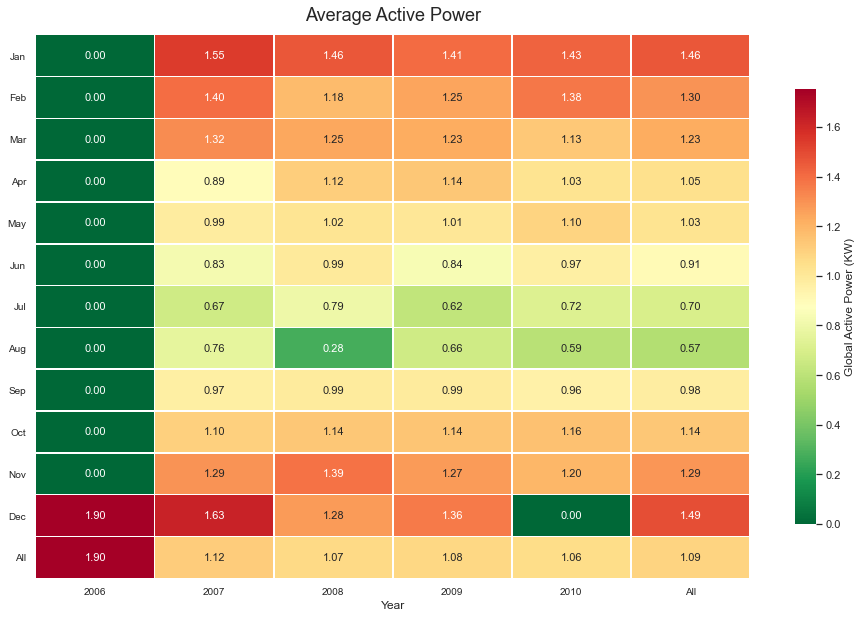

In [34]:
pivot_heatmap(all_month_year_df, 'Average Active Power')

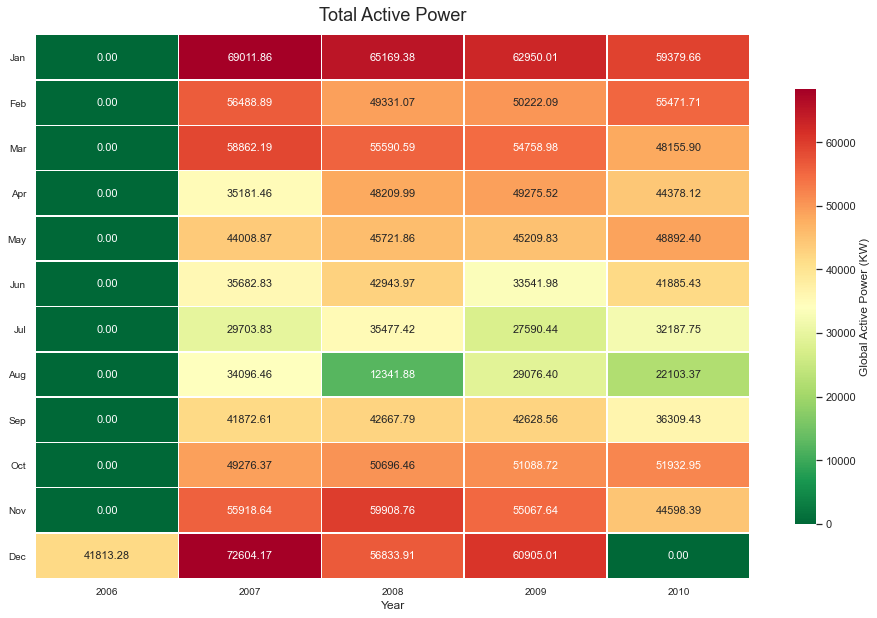

In [35]:
# Let's find out total active power per month
all_month_year_sum_df = pd.pivot_table(ehc, values="Global_active_power",
                                       index=["Month"],
                                       columns=["Year"],
                                       fill_value=0,
                                        aggfunc=np.sum)
all_month_year_sum_df = all_month_year_sum_df.set_index([[calendar.month_abbr[i] if isinstance(i, int) else i 
                                                          for i in list(all_month_year_sum_df.index)]])
pivot_heatmap(all_month_year_sum_df, 'Total Active Power')

In [36]:
ehc['weekday'] = ehc.Date.dt.weekday
ehc

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,weekday
0,2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,2006,12,16,5
1,2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,2006,12,16,5
2,2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,2006,12,16,5
3,2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,2006,12,16,5
4,2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,2006,12,16,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0,2010,11,26,4
2049276,2010-11-26 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0,2010,11,26,4
2049277,2010-11-26 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0,2010,11,26,4
2049278,2010-11-26 21:01:00,0.934,0.000,239.699997,3.8,0.0,0.0,0.0,2010,11,26,4


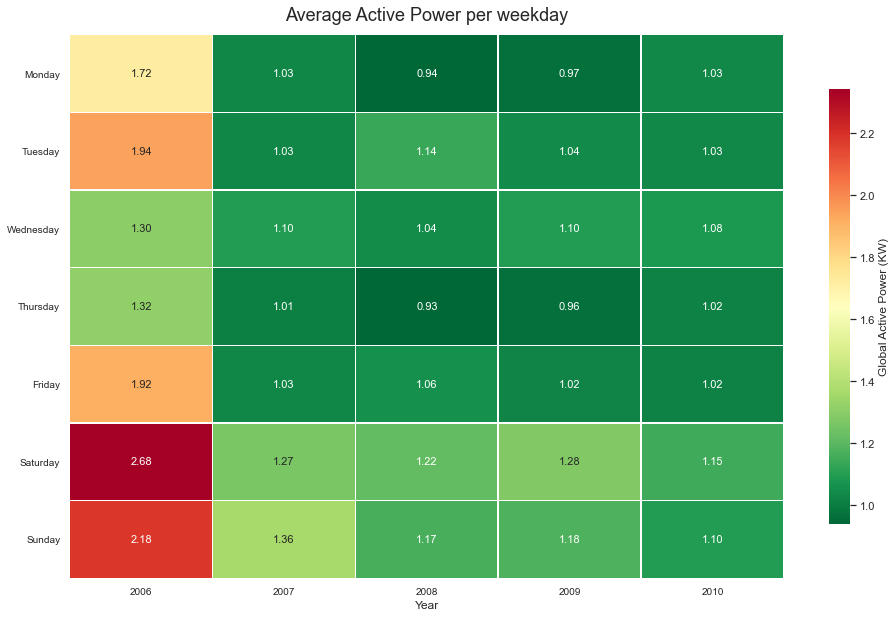

In [37]:
all_weekdays_year_df = pd.pivot_table(ehc, values="Global_active_power",
                                       index=["weekday"],
                                       columns=["Year"],
                                       fill_value=0)
all_weekdays_year_df = all_weekdays_year_df.set_index([[calendar.day_name[i] if isinstance(i, int) else i 
                                                          for i in list(all_weekdays_year_df.index)]])
pivot_heatmap(all_weekdays_year_df, 'Average Active Power per weekday')

In the August 2008, It seems has the lowest average and sum active power.... Let's try to visualize it

### Visualize power usage in August 2008

In [38]:
august_ehc = ehc.loc[(ehc['Month'] == 8) & (ehc['Year'] == 2008)]
august_ehc

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,weekday
850371,2008-08-01 00:00:00,0.500,0.226,239.750000,2.4,0.0,0.0,1.0,2008,8,1,4
850372,2008-08-01 00:01:00,0.482,0.224,240.339996,2.2,0.0,0.0,1.0,2008,8,1,4
850373,2008-08-01 00:02:00,0.502,0.234,241.679993,2.4,0.0,0.0,0.0,2008,8,1,4
850374,2008-08-01 00:03:00,0.556,0.228,241.750000,2.6,0.0,0.0,1.0,2008,8,1,4
850375,2008-08-01 00:04:00,0.854,0.342,241.550003,4.0,0.0,1.0,7.0,2008,8,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
895004,2008-08-31 23:55:00,1.286,0.000,241.869995,5.2,0.0,0.0,18.0,2008,8,31,6
895005,2008-08-31 23:56:00,1.284,0.000,242.570007,5.2,0.0,0.0,19.0,2008,8,31,6
895006,2008-08-31 23:57:00,1.296,0.000,243.470001,5.2,0.0,0.0,19.0,2008,8,31,6
895007,2008-08-31 23:58:00,1.302,0.000,243.479996,5.4,0.0,1.0,18.0,2008,8,31,6


In [39]:
august_daily = august_ehc.groupby(pd.Grouper(key='Date', freq='D')).mean()
august_daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,weekday
Date,,,,,,,,,,,
2008-08-01,0.513594,0.175489,239.805435,2.327917,0.406944,0.798611,3.535417,2008,8,1,4
2008-08-02,0.351233,0.123815,239.128723,1.587917,0.000000,0.350000,2.640972,2008,8,2,5
2008-08-03,0.350543,0.115314,237.054443,1.576667,0.000000,0.346528,2.726389,2008,8,3,6
2008-08-04,0.782432,0.134552,237.863464,3.417234,0.414177,3.250174,3.064628,2008,8,4,0
2008-08-05,0.574387,0.125172,238.736465,2.505972,0.440972,0.353472,4.943056,2008,8,5,1
2008-08-06,0.226467,0.148961,240.565826,1.090417,0.000000,0.356250,1.538194,2008,8,6,2
2008-08-07,0.232558,0.149264,239.312332,1.120694,0.000000,0.365278,1.636806,2008,8,7,3
2008-08-08,0.209861,0.136422,239.456543,1.005556,0.000000,0.334028,1.375000,2008,8,8,4
2008-08-09,0.249253,0.138882,240.710464,1.160278,0.000000,0.339583,1.320833,2008,8,9,5


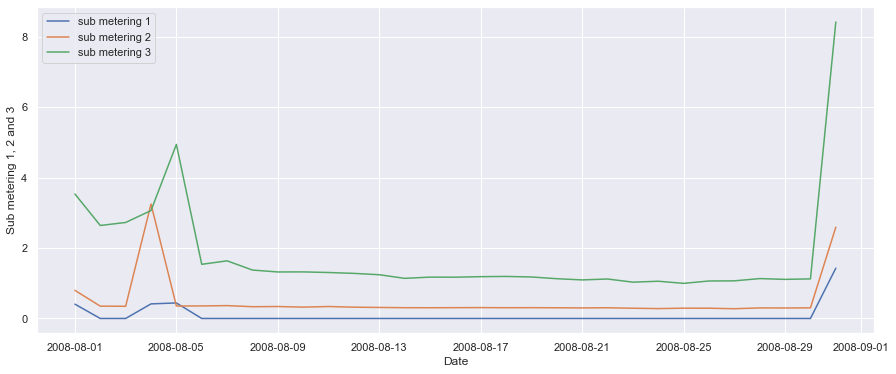

In [40]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Sub_metering_1', data=august_daily, label='sub metering 1')
sns.lineplot(x='Date', y='Sub_metering_2', data=august_daily, label='sub metering 2')
sns.lineplot(x='Date', y='Sub_metering_3', data=august_daily, label='sub metering 3')
plt.ylabel('Sub metering 1, 2 and 3')
plt.show()

Based on the lineplot above, we can see that average power constant under 2 watt-hour in sub metering 1, 2 and 3 from 5th of august until 29th of august.

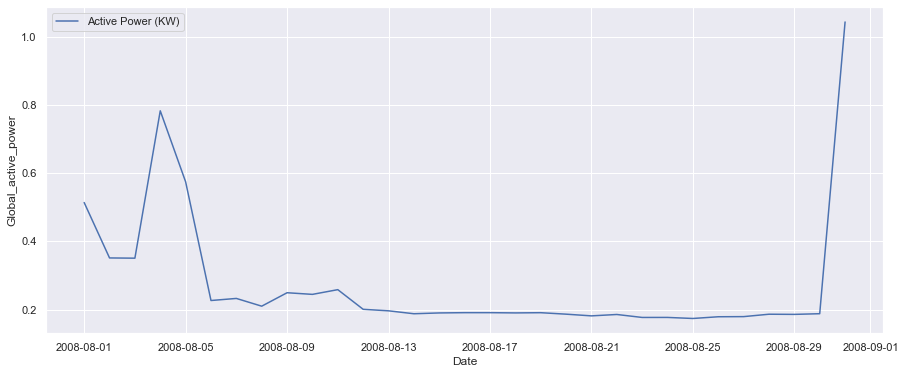

In [41]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Global_active_power', data=august_daily, label='Active Power (KW)')
plt.show();

In [42]:
sept_ehc = ehc.loc[(ehc['Month'] == 9) & (ehc['Year'] == 2008)]
sept_daily = sept_ehc.groupby(pd.Grouper(key='Date', freq='D')).mean()

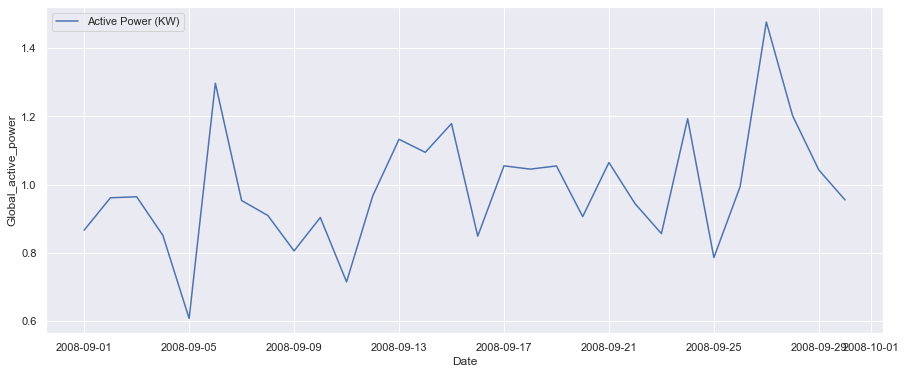

In [43]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Global_active_power', data=sept_daily, label='Active Power (KW)')
plt.show();